1. Load Dataset and Initial Exploration
First, load the dataset and explore its structure.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Show first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Data Cleaning
Handle missing values: Age has missing values. We can fill them with the median age.
Drop unnecessary columns: Drop irrelevant columns like Cabin which has too many missing values, and Ticket which may not be useful.
Convert categorical data: Convert Sex and Embarked to numerical values.

In [12]:
# Handle missing values in 'Age' by filling with median
median_age = df['Age'].median()
#df['Age'].fillna({df['Age']:median_age}, inplace=True)
df['Age'] = df['Age'].fillna(median_age)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Drop 'Cabin' and 'Ticket' as they are not needed
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Handle missing values in 'Embarked' by filling with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
# Convert 'Sex' to numerical values: male = 1, female = 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [23]:
# Convert 'Embarked' to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,False,True


3. Exploratory Data Analysis (EDA) and Visualization
Now, let’s create some visualizations to understand the relationships between features and survival.

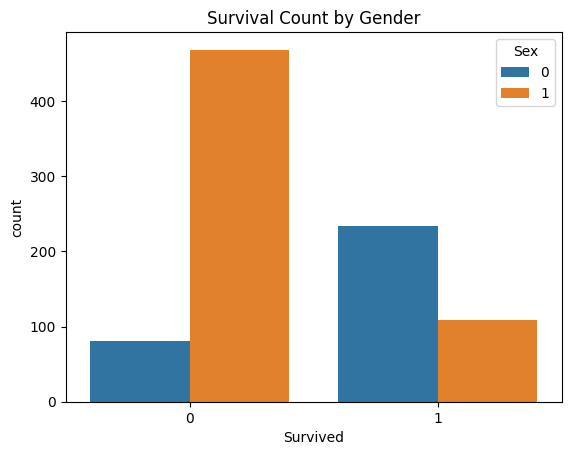

In [25]:
# Survival count by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

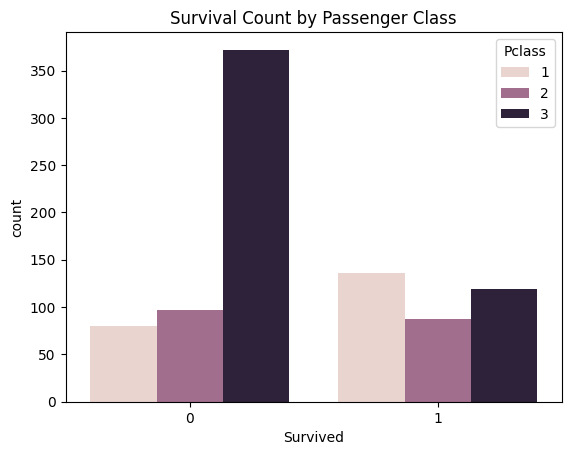

In [26]:
# Survival count by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

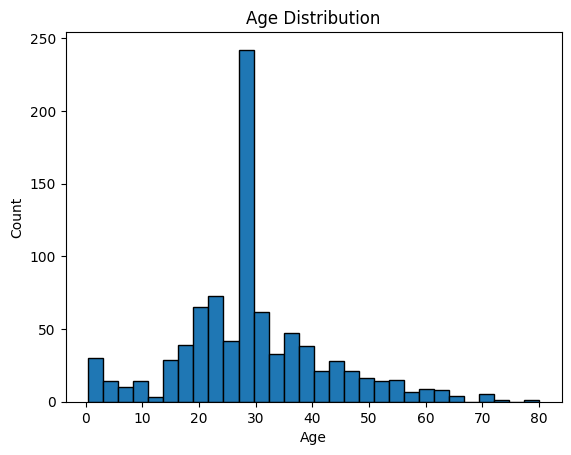

In [27]:
# Age distribution
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

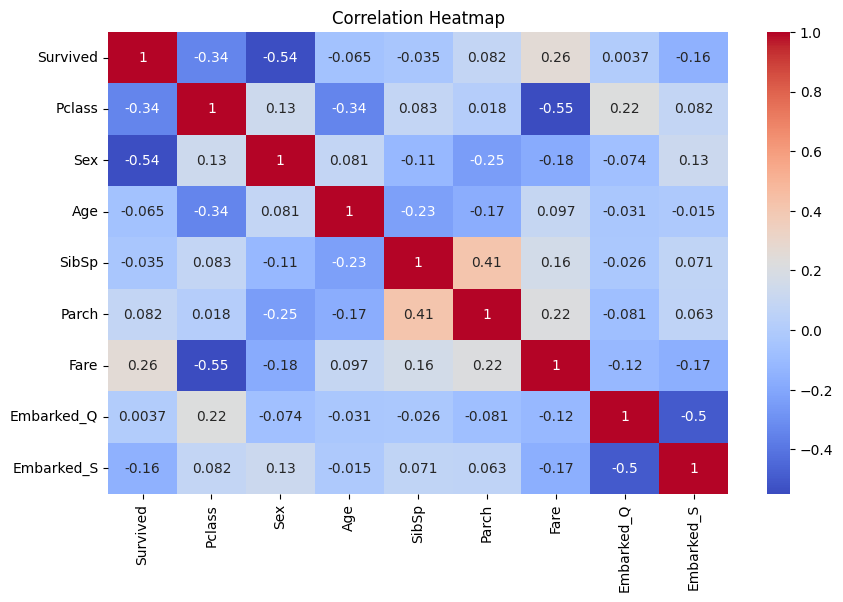

In [32]:
# Heatmap of correlations between features
df = df.drop(['Name', 'PassengerId'], axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4. Data Preparation for Modeling
Separate features and target: We will now split the data into features (X) and target (y).
Train-test split: Split the data into training and testing sets.

In [33]:
# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Model Training and Prediction
Train different supervised learning algorithms like Logistic Regression, Decision Tree, and Random Forest. We will evaluate the performance using accuracy and a confusion matrix.

In [34]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8100558659217877


Confusion Matrix:
 [[90 15]
 [19 55]]


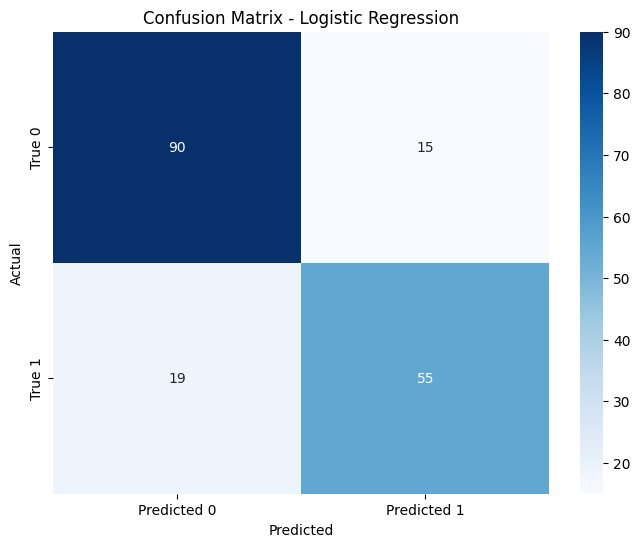

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print('Confusion Matrix:\n', cm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dtree)}')
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.7932960893854749


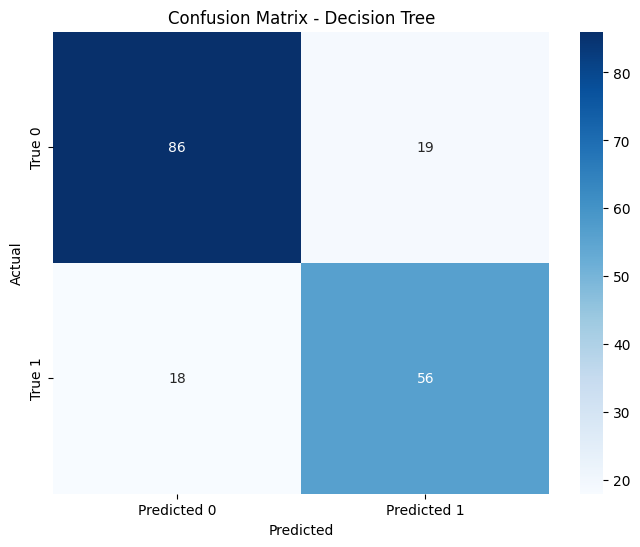

In [44]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(8,6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
# Random Forest Classifier
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rforest)}')
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rforest))

Random Forest Accuracy: 0.8268156424581006


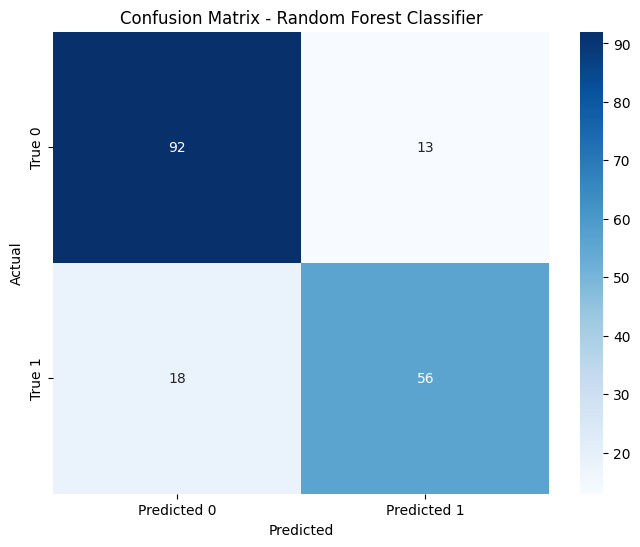

In [50]:
cm_rf = confusion_matrix(y_test, y_pred_rforest)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

6. Model Evaluation
Evaluate the performance of the models using additional metrics such as precision, recall, and F1-score.

In [51]:
from sklearn.metrics import classification_report

# Classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rforest))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro av

7. Hyperparameter Tuning (Optional)
You can also improve the models by tuning hyperparameters using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_}')
